## Análisis de la columna "location"

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

Obtenemos el dataframe:

In [2]:
df = pd.read_csv("train.csv")
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
len(df)

7613

In [4]:
df.count()

id          7613
keyword     7552
location    5080
text        7613
target      7613
dtype: int64

In [5]:
len(df.loc[df["location"].isna()]) # Cantidad de tweets sin ubicación

2533

In [6]:
f'{(len(df.loc[df["location"].isna()]) / len(df)) * 100:.2f}%' # Porcentaje de valores nulos

'33.27%'

Se observa que `location` es la columna con la mayor cantidad de valores nulos. Una pregunta que podríamos hacernos es, ¿influye que el tweet tenga o no ubicación en la veracidad del mismo?

In [7]:
location_not_null_target = df.loc[df["location"].notnull()]["target"].value_counts()
location_not_null_target

0    2884
1    2196
Name: target, dtype: int64

In [8]:
location_null_target = df.loc[df["location"].isna()]["target"].value_counts()
location_null_target

0    1458
1    1075
Name: target, dtype: int64

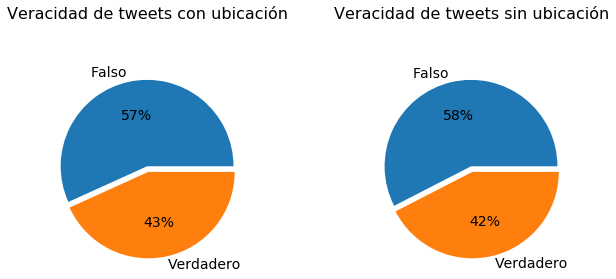

In [9]:
fig = plt.figure()

ax1 = fig.add_axes([0, 0, .5, .5], aspect=1)
ax1.pie(
    location_not_null_target,
    autopct="%1.0f%%",
    explode=(0.05, 0.05),
    labels=("Falso", "Verdadero"),
    radius=1.5,
    textprops={"fontsize": 14}
)
plt.title("Veracidad de tweets con ubicación", y=1.5, fontsize=16)

ax2 = fig.add_axes([.75, 0, .5, .5], aspect=1)
ax2.pie(
    location_null_target,
    autopct="%1.0f%%",
    explode=(0.05, 0.05),
    labels=("Falso", "Verdadero"),
    radius=1.5,
    textprops={"fontsize": 14}
)
plt.title("Veracidad de tweets sin ubicación", y=1.5, fontsize=16)

plt.show()

A continuación podemos ver cuántos tweets tenemos de cada ubicación:

In [10]:
df["location"].value_counts()

USA                       104
New York                   71
United States              50
London                     45
Canada                     29
                         ... 
#NewcastleuponTyne #UK      1
Brentwood,TN                1
A sofa                      1
The Internet                1
Saint Lucia                 1
Name: location, Length: 3341, dtype: int64

In [11]:
df["location"].value_counts().describe()

count    3341.000000
mean        1.520503
std         3.022364
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max       104.000000
Name: location, dtype: float64

Por las estadísticas obtenidas, se ve que la mayoría de las ubicaciones aparecen pocas veces.

In [12]:
location_value_counts = df["location"].value_counts()

In [13]:
location_value_counts.loc[location_value_counts == 1]

Kingston, Pennsylvania      1
Greeley, CO                 1
England,UK,Europe,Sol 3.    1
Denton, Texas               1
Eddyville, Oregon 97343     1
                           ..
#NewcastleuponTyne #UK      1
Brentwood,TN                1
A sofa                      1
The Internet                1
Saint Lucia                 1
Name: location, Length: 2818, dtype: int64

In [14]:
location_value_counts.loc[location_value_counts == 2]

dallas                2
617-BTOWN-BEATDOWN    2
everywhere            2
Breaking News         2
Houston               2
                     ..
Pittsburgh            2
Gainesville, FL       2
Ukraine               2
Cumming, GA           2
Moscow                2
Name: location, Length: 266, dtype: int64

In [15]:
location_value_counts.loc[location_value_counts > 5]

USA                          104
New York                      71
United States                 50
London                        45
Canada                        29
                            ... 
Paterson, New Jersey           6
Global                         6
Calgary, Alberta               6
California, United States      6
Charlotte, NC                  6
Name: location, Length: 76, dtype: int64

In [16]:
location_value_counts.loc[location_value_counts > 50]

USA         104
New York     71
Name: location, dtype: int64

In [17]:
# Porcentaje de ubicaciones con una sola aparición
f"{(len(location_value_counts.loc[location_value_counts == 1]) / len(location_value_counts)) * 100 :.2f}%"

'84.35%'

In [18]:
# Porcentaje de ubicaciones con más de 10 apariciones
f"{(len(location_value_counts.loc[location_value_counts > 10]) / len(location_value_counts)) * 100 :.2f}%"

'0.96%'

In [19]:
# Porcentaje de ubicaciones con más de 50 apariciones
f"{(len(location_value_counts.loc[location_value_counts > 50]) / len(location_value_counts)) * 100 :.2f}%"

'0.06%'

Text(0, 0.5, 'Cantidad de ubicaciones')

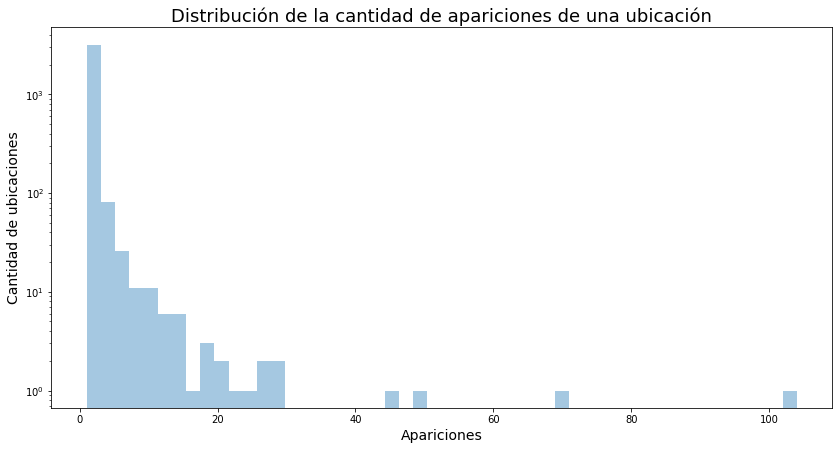

In [20]:
plt.figure(figsize=(14,7))
ax = sns.distplot(df["location"].value_counts(), kde=False)
ax.set_yscale("log")
plt.title("Distribución de la cantidad de apariciones de una ubicación", fontsize=18)
plt.xlabel("Apariciones", fontsize=14)
plt.ylabel("Cantidad de ubicaciones", fontsize=14)

Obtenemos las ubicaciones más y menos frecuentes:

In [21]:
df["location"].value_counts().head(10)

USA                104
New York            71
United States       50
London              45
Canada              29
Nigeria             28
UK                  27
Los Angeles, CA     26
India               24
Mumbai              22
Name: location, dtype: int64

In [22]:
df["location"].value_counts().tail(10)

Warszawa                          1
Dublin                            1
 45å¡ 5'12.53N   14å¡ 7'24.93E    1
Tornado Alley, USA                1
nj                                1
#NewcastleuponTyne #UK            1
Brentwood,TN                      1
A sofa                            1
The Internet                      1
Saint Lucia                       1
Name: location, dtype: int64

Podemos obtener, por ejemplo, los tweets de las 10 ubicaciones más frecuentes:

In [23]:
top_locations = df["location"].value_counts().nlargest(10).index.to_list()
tweets_from_top_locations = df[df["location"].isin(top_locations)]

Y con estos datos realizar un gráfico:

Text(0, 0.5, 'Ubicación')

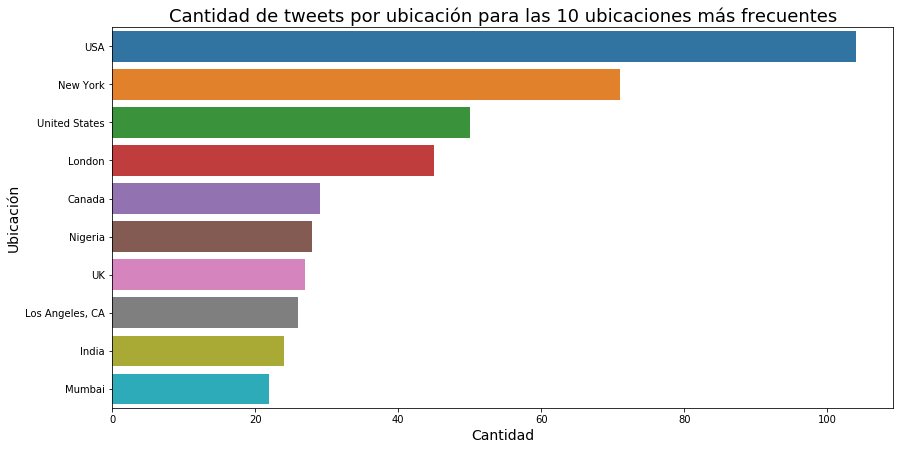

In [24]:
plt.figure(figsize=(14,7))

sns.countplot(
    y="location",
    data=tweets_from_top_locations,
    order=top_locations
)

plt.title("Cantidad de tweets por ubicación para las 10 ubicaciones más frecuentes", fontsize=18)
plt.xlabel("Cantidad", fontsize=14)
plt.ylabel("Ubicación", fontsize=14)

Analicemos ahora los tweets diferenciándolos por su `target`:

In [25]:
real_tweets = df.loc[df["target"] == 1]
false_tweets = df.loc[df["target"] == 0]

In [26]:
len(real_tweets)

3271

In [27]:
real_tweets["location"].value_counts().head(10)

USA               67
United States     27
Nigeria           22
India             20
Mumbai            19
New York          16
UK                16
London            16
Washington, DC    15
Canada            13
Name: location, dtype: int64

In [28]:
len(false_tweets)

4342

In [29]:
false_tweets["location"].value_counts().head(10)

New York           55
USA                37
London             29
United States      23
Los Angeles, CA    18
Canada             16
Kenya              15
Everywhere         12
UK                 11
Florida            11
Name: location, dtype: int64

In [30]:
tweet_counts = (df.groupby(["location", "target"])
                .agg({"text": "count"})
                .reset_index()
                .rename(columns={"text": "count"}))

tweet_counts_from_top_locations = tweet_counts.loc[tweet_counts["location"].isin(top_locations)]

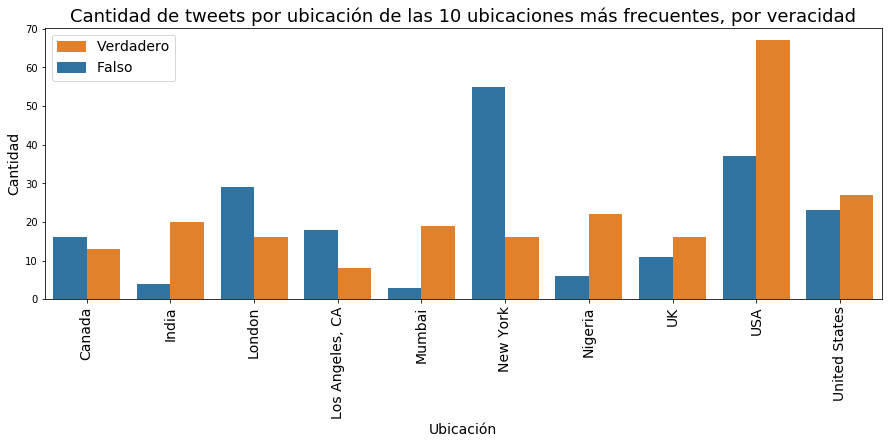

In [31]:
plt.figure(figsize=(15,5))
p = sns.barplot(x="location", y="count", hue="target", data=tweet_counts_from_top_locations)

plt.legend(handles=[
    mpatches.Patch(color='#E1812C', label='Verdadero'),
    mpatches.Patch(color='#3274A1', label='Falso')
], prop={'size': 14})

plt.title("Cantidad de tweets por ubicación de las 10 ubicaciones más frecuentes, por veracidad", fontsize=18)
plt.xlabel("Ubicación", fontsize=14)
plt.ylabel("Cantidad", fontsize=14)
plt.setp(p.get_xticklabels(), rotation=90, fontsize=14)
plt.show()

Analizemos ahora distinguiendo entre ubicaciones reales y falsas.

In [32]:
no_null_locations_df = df.loc[df["location"].notnull()]

In [33]:
fake_locations = no_null_locations_df["location"].str.contains(
    "\$|!|@|\%|\&|\/|\(|\)|\=|\?|#|\d+",
    regex=True
)
# Consideramos que las ubicaciones que tengan alguno de estos símbolos tienen una alta probabilidad de ser falsas

In [34]:
tweets_fake_locations = no_null_locations_df.loc[fake_locations]
tweets_real_locations = no_null_locations_df.loc[~fake_locations]

In [35]:
len(tweets_fake_locations)

639

In [36]:
# Porcentaje de tweets con ubicaciones falsas
f"{(len(tweets_fake_locations) / len(no_null_locations_df)) * 100 :.2f}%"

'12.58%'

In [37]:
len(tweets_real_locations)

4441

In [38]:
# Porcentaje de tweets con ubicaciones reales
f"{(len(tweets_real_locations) / len(no_null_locations_df)) * 100 :.2f}%"

'87.42%'

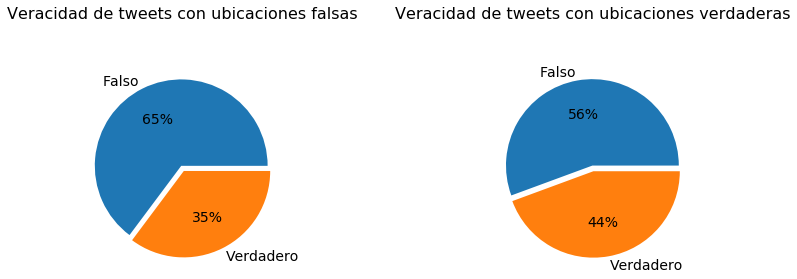

In [39]:
fig = plt.figure()

ax1 = fig.add_axes([0, 0, .5, .5], aspect=1)
ax1.pie(
    tweets_fake_locations["target"].value_counts(),
    autopct="%1.0f%%",
    explode=(0.05, 0.05),
    labels=("Falso", "Verdadero"),
    radius=1.5,
    textprops={"fontsize": 14}
)
plt.title("Veracidad de tweets con ubicaciones falsas", y=1.5, fontsize=16)

ax2 = fig.add_axes([.95, 0, .5, .5], aspect=1)
ax2.pie(
    tweets_real_locations["target"].value_counts(),
    autopct="%1.0f%%",
    explode=(0.05, 0.05),
    labels=("Falso", "Verdadero"),
    radius=1.5,
    textprops={"fontsize": 14}
)
plt.title("Veracidad de tweets con ubicaciones verdaderas", y=1.5, fontsize=16)

plt.show()